In [1]:
import torch
import torch.nn as nn

with open('data/en-zh.tsv', encoding='utf-8') as f:
    lines = f.readlines()

print(lines[:5])

['\ufeff1277\tI have to go to sleep.\t2\t我该去睡觉了。\n', "1280\tToday is June 18th and it is Muiriel's birthday!\t5\t今天是６月１８号，也是Muiriel的生日！\n", '1282\tMuiriel is 20 now.\t7\tMuiriel现在20岁了。\n', '1283\tThe password is "Muiriel".\t8\t密码是"Muiriel"。\n', '1284\tI will be back soon.\t9\t我很快就會回來。\n']


In [2]:
with open('data/en-zh.tsv', encoding='utf-8') as f:
    data = []
    for line in f.readlines():
        data.append(line.strip().split('\t')[1] + '\t' + line.strip().split('\t')[3])

print(lines[:5])

['\ufeff1277\tI have to go to sleep.\t2\t我该去睡觉了。\n', "1280\tToday is June 18th and it is Muiriel's birthday!\t5\t今天是６月１８号，也是Muiriel的生日！\n", '1282\tMuiriel is 20 now.\t7\tMuiriel现在20岁了。\n', '1283\tThe password is "Muiriel".\t8\t密码是"Muiriel"。\n', '1284\tI will be back soon.\t9\t我很快就會回來。\n']


In [3]:
import re
import string

content = ''.join(data)
# Replace Chinese characters with space
special_char = re.sub(r'[\u4e00-\u9fa5]', ' ', content)

print(set(special_char) - set(string.ascii_letters) - set(string.digits))

{'‐', 'ā', 'ç', '《', '\u202f', 'ǔ', '[', '–', '_', '１', '「', ' ', '’', 'á', '𣬠', '︀', 'あ', 'ò', ':', 'ù', '０', '!', "'", ',', 'ę', 'ï', 'ì', '…', 'β', '５', '８', '『', '〇', 'Ｑ', 'ń', '𣬶', '”', ']', '\u3000', 'à', '６', 'а', '\xad', 'ó', '-', '₣', 'ã', 'ǐ', 'è', '﹣', '％', '"', '！', '、', ')', '，', 'α', '‧', '·', '‘', '。', '€', '』', 'ī', '→', '─', '：', '°', 'ł', 'ö', '$', '%', '﹐', 'ß', '（', '“', '」', '?', '(', '\u200b', 'Ü', '\t', '？', '⋯', 'ū', 'ü', 'é', '»', 'í', '+', '＂', '—', '）', 'ō', '～', '３', '@', '&', '«', '》', '－', '.', ';', '/', 'ǎ', '☭', '•', '；'}


In [4]:
eng_mark = [',', '.', '!', '?']

def clean_data(data):
    for i in range(len(data)):
        data[i] = data[i].replace('\u200b', '')
        data[i] = data[i].replace('\u200f', '')
        data[i] = data[i].replace('\xad', '')
        data[i] = data[i].replace('\u3000', '')
        # Add space before mark for better tokenization
        for mark in eng_mark:
            data[i] = data[i].replace(mark, ' ' + mark)
        data[i] = data[i].lower()
    return data

In [5]:
clean_data(data)

['i have to go to sleep .\t我该去睡觉了。',
 "today is june 18th and it is muiriel's birthday !\t今天是６月１８号，也是muiriel的生日！",
 'muiriel is 20 now .\tmuiriel现在20岁了。',
 'the password is "muiriel" .\t密码是"muiriel"。',
 'i will be back soon .\t我很快就會回來。',
 "i'm at a loss for words .\t我不知道應該說什麼才好。",
 'this is never going to end .\t這個永遠完不了了。',
 'this is never going to end .\t这将永远继续下去。',
 "i just don't know what to say .\t我只是不知道應該說什麼而已……",
 "i just don't know what to say .\t我就是不知道說些什麼。",
 'that was an evil bunny .\t那是一隻有惡意的兔子。',
 'i was in the mountains .\t我以前在山里。',
 'is it a recent picture ?\t那是一张近照吗？',
 "i don't know if i have the time .\t我不知道我有沒有時間。",
 'education in this world disappoints me .\t世界上的教育都讓我失望。',
 "you're in better shape than i am .\t你的體型比我的好。",
 'you are in my way .\t你擋住了我的路。',
 'this will cost €30 .\t這個要三十歐元。',
 'i make €100 a day .\t我一天賺一百歐元。',
 'i may give up soon and just nap instead .\t也许我会马上放弃然后去打盹。',
 "that won't happen .\t那是不會發生的。",
 'i can only wonder if this is the same for every

In [6]:
def tokenize(data):
    source_tokens, target_tokens = [], []
    for line in data:
        pair = line.split('\t')
        source = pair[0].split(' cleaning')
        target = list(pair[1])
        source_tokens.append(source)
        target_tokens.append(target)
    return source_tokens, target_tokens

source_tokens, target_tokens = tokenize(data)
print("source_tokens: ", source_tokens[:6])
print("target_tokens: ", target_tokens[:6])

source_tokens:  [['i have to go to sleep .'], ["today is june 18th and it is muiriel's birthday !"], ['muiriel is 20 now .'], ['the password is "muiriel" .'], ['i will be back soon .'], ["i'm at a loss for words ."]]
target_tokens:  [['我', '该', '去', '睡', '觉', '了', '。'], ['今', '天', '是', '６', '月', '１', '８', '号', '，', '也', '是', 'm', 'u', 'i', 'r', 'i', 'e', 'l', '的', '生', '日', '！'], ['m', 'u', 'i', 'r', 'i', 'e', 'l', '现', '在', '2', '0', '岁', '了', '。'], ['密', '码', '是', '"', 'm', 'u', 'i', 'r', 'i', 'e', 'l', '"', '。'], ['我', '很', '快', '就', '會', '回', '來', '。'], ['我', '不', '知', '道', '應', '該', '說', '什', '麼', '才', '好', '。']]


In [7]:
import numpy as np

def statistics(tokens):
    max_len = 80
    len_list = range(max_len)
    freq_list = np.zeros(max_len)
    for token in tokens:
        if len(token) < max_len:
            freq_list[len_list.index(len(token))] += 1
    return len_list, freq_list

s1, s2 = statistics(source_tokens)
t1, t2 = statistics(target_tokens)

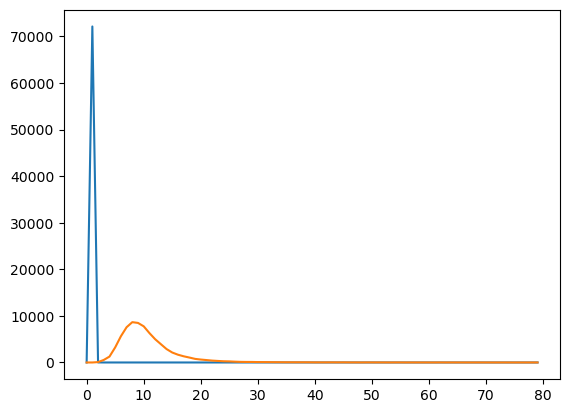

In [8]:
import matplotlib.pyplot as plt

plt.plot(s1, s2)
plt.plot(t1, t2)

In [9]:
from collections import Counter

flatten = lambda l: [item for sublist in l for item in sublist]

class Vocab:
    def __init__(self, tokens):
        self.tokens = tokens
        self.token2index = {'<bos>': 0, '<eos>': 1, '<unk>': 2, '<pad>': 3}

        self.token2index.update({
            token: index + 4
            for index, token in enumerate(
                sorted(Counter(flatten(self.tokens)).items(), key=lambda x: x[1], reverse=True)
            )
        })

        self.index2token = {index: token for token, index in self.token2index.items()}

    def __getitem__(self, query):
        if isinstance(query, (str, int)):
            if isinstance(query, str):
                return self.token2index.get(query, 0)
            elif isinstance(query, (int)):
                return self.index2token.get(query, '<unk>')
        elif isinstance(query, (list, tuple)):
            return [self.__getitem__(item) for item in query]

    def __len__(self):
        return len(self.index2token)

In [10]:
from torch.utils.data import DataLoader, TensorDataset

seq_len = 48

def padding(tokens, seq_len):
    return tokens[:seq_len] if len(tokens) > seq_len else tokens + ['<pad>'] * (seq_len - len(tokens))

source_vocab, target_vocab = Vocab(source_tokens), Vocab(target_tokens)

source_data = torch.tensor([source_vocab[padding(line + ['<eos>'], seq_len)] for line in source_tokens])
target_data = torch.tensor([target_vocab[padding(line + ['<eos>'], seq_len)] for line in target_tokens])

train_size = int(len(source_data) * 0.8)
test_size = len(source_data) - train_size
batch_size = 256

train_loader = DataLoader(TensorDataset(source_data[:train_size], target_data[:train_size]), batch_size=batch_size)
test_loader = DataLoader(TensorDataset(source_data[train_size:], target_data[train_size:]), batch_size=1)

In [11]:
class Encoder(nn.Module):
    def __init__(self, vocab_size, emb_size, hidden_size, num_layers):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size, padding_idx=3)
        self.gru = nn.GRU(emb_size, hidden_size, num_layers=num_layers)

    def forward(self, encoder_inputs):
        encoder_inputs = self.embedding(encoder_inputs).permute(1, 0, 2)
        output, hidden = self.gru(encoder_inputs)
        return hidden

class Decoder(nn.Module):
    def __init__(self, vocab_size, emb_size, hidden_size, num_layers):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size, padding_idx=3)
        self.gru = nn.GRU(emb_size + hidden_size, hidden_size, num_layers=num_layers)
        self.linear = nn.Linear(hidden_size, vocab_size)

    def forward(self, decoder_inputs, encoder_states):
        decoder_inputs = self.embedding(decoder_inputs).permute(1, 0, 2)
        context = encoder_states[-1]
        context = context.repeat(decoder_inputs.shape[0], 1, 1)
        output, hidden = self.gru(torch.cat((decoder_inputs, context), -1), encoder_states)
        logits = self.linear(output)
        return logits, hidden

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, encoder_inputs, decoder_inputs):
        return self.decoder(decoder_inputs, self.encoder(encoder_inputs))

In [12]:
from tqdm import *
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'

lr = 0.001
num_epochs = 50
hidden_size = 256

encoder = Encoder(len(source_vocab), len(source_vocab), hidden_size, num_layers=2)
decoder = Decoder(len(target_vocab), len(target_vocab), hidden_size, num_layers=2)
model = Seq2Seq(encoder, decoder)
model.to(device)

criterion = nn.CrossEntropyLoss(reduction='none', ignore_index=3)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loss_history = []

model.train()
for epoch in tqdm(range(num_epochs)):
    for encoder_inputs, decoder_targets in train_loader:
        encoder_inputs, decoder_targets = encoder_inputs.to(device), decoder_targets.to(device)
        bos_column = torch.tensor([target_vocab['<bos>']] * decoder_targets.shape[0]).reshape(-1, 1).to(device)
        decoder_inputs = torch.cat((bos_column, decoder_targets[:, :-1]), dim=1)
        pred, _ = model(encoder_inputs, decoder_inputs)
        loss = criterion(pred.permute(1, 2, 0), decoder_targets).mean()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())

  0%|          | 0/50 [00:18<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 4.84 GiB. GPU 0 has a total capacity of 15.92 GiB of which 0 bytes is free. Of the allocated memory 22.08 GiB is allocated by PyTorch, and 3.09 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
plt.plot(loss_history)
plt.ylabel('train loss')
plt.show()

In [ ]:
torch.save(model.state_dict(), 'machine_translation.pt')

In [ ]:
import math

def bleu(label, pred, n):
    score = math.exp(min(0, 1 - len(label) / len(pred)))
    for k in range(1, n + 1):
        num_matches = 0
        hashtable = Counter([' '.join(label[i : i + k]) for i in range(len(label) - k + 1)])
        for i in range(len(pred) - k + 1):
            ngram = ' '.join(pred[i : i + k])
            if ngram in hashtable and hashtable[ngram] > 0:
                num_matches += 1
                hashtable[ngram] -= 1
        score *= pow(num_matches / (len(pred) - k + 1), pw(0.5, k))
    return score

In [ ]:
model.eval()
translation_results = []
bleu_scores = []

for source_seq, target_seq in test_loader:
    encoder_inputs = source_seq
    hidden = model.encoder(encoder_inputs.to(device))
    pred_seq = [target_vocab['<bos>']]
    for _ in range(8):
        decoder_inputs = torch.tensor(pred_seq[-1]).reshape(1, 1).to(device)
        pred, hidden = model.decoder(decoder_inputs, hidden)
        next_token_index = pred.squeeze().argmax().item()
        if next_token_index == target_vocab['<eos>']:
            break
        pred_seq.append(next_token_index)

    pred_seq = target_vocab[pred_seq[1:]]
    target_seq = target_seq.squeeze().tolist()

    if target_vocab['<eos>'] in target_seq:
        eos_idx = target_seq.index(target_vocab['<eos>'])
        target_seq = target_vocab[target_seq[:eos_idx]]
    else:
        target_seq = target_vocab[target_seq]
    translation_results.append((' '.join(target_seq), ' '.join(pred_seq)))
    bleu_scores.append(bleu(target_seq, pred_seq, n=2))

In [ ]:
print(sum(bleu_scores) / test_size)

In [ ]:
translation_results